# *Integrating Economic Indicators, Sentiment, and Technical Analysis for Predictive Stock Market Modeling*

- Rohan Kumar Katkam
- U00906391

# **Creating Dataset From Scratch**





In [ ]:
pip install fredapi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from fredapi import Fred

fred = Fred(api_key='b2419eb621ff879d18d6e76e60684195')

dji = yf.download('^DJI', start="1992-01-01")
dji = dji['Adj Close']  # Adjusted Close for DJI

indicators = {
    'GDP Growth Rate': 'A191RL1Q225SBEA',
    'Interest Rate': 'FEDFUNDS',
    'Inflation Rate': 'CPIAUCSL',
    'Unemployment Rate': 'UNRATE',
    'Government Debt to GDP': 'GFDEGDQ188S',
    'Balance of Trade': 'BOPGSTB',
    'Current Account to GDP': 'NETFI',
    'Credit Rating': 'BAMLH0A0HYM2',
    'Retail Sales': 'RSXFS'
}

indicator_data = {}

for indicator_name, series_code in indicators.items():
    indicator_data[indicator_name] = fred.get_series(series_code)

start_date = pd.to_datetime("1992-01-01")

for indicator_name in indicator_data:
    indicator_data[indicator_name] = indicator_data[indicator_name][indicator_data[indicator_name].index >= start_date]


[*********************100%***********************]  1 of 1 completed


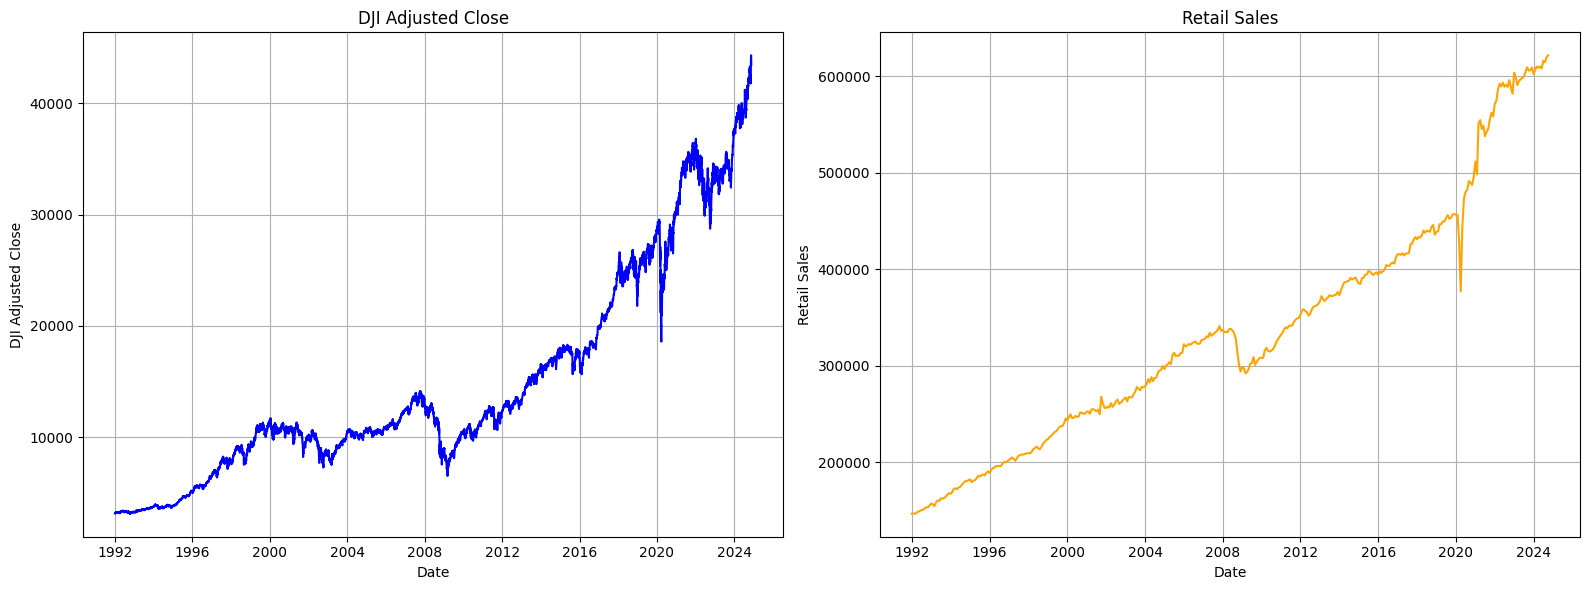

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(dji.index, dji, label="DJI", color='blue')
plt.title('DJI Adjusted Close')
plt.xlabel('Date')
plt.ylabel('DJI Adjusted Close')
plt.grid(True)

retail_sales = fred.get_series('RSXFS').loc["1992-01-01":]
plt.subplot(1, 2, 2)
plt.plot(retail_sales.index, retail_sales, label="Retail Sales", color='orange')
plt.title('Retail Sales')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dji_monthly_ema_20.csv to dji_monthly_ema_20.csv


In [ ]:
import pandas as pd

file_name = 'dji_monthly_ema_20.csv'

df = pd.read_csv(file_name)

df_cleaned = df.dropna()

df_cleaned = df_cleaned[df_cleaned['Price'] != 'Ticker']
df_cleaned = df_cleaned[df_cleaned['Price'] != 'Date']

df_cleaned.reset_index(drop=True, inplace=True)

len(df_cleaned)

393

In [ ]:
df_cleaned

,Price,Close,EMA_20
0,1992-01-01 00:00:00+00:00,3204.800048828125,3204.800049
1,1992-02-01 00:00:00+00:00,3251.60009765625,3209.257196
2,1992-03-01 00:00:00+00:00,3231.0,3211.327940
3,1992-04-01 00:00:00+00:00,3213.60009765625,3211.544336
4,1992-05-01 00:00:00+00:00,3385.10009765625,3228.073456
...,...,...,...
388,2024-05-01 00:00:00+00:00,38884.26171875,35724.391997
389,2024-06-01 00:00:00+00:00,38747.421875,36012.299604
390,2024-07-01 00:00:00+00:00,39291.96875,36324.649047
391,2024-08-01 00:00:00+00:00,39765.640625,36652.362530


In [ ]:
import pandas as pd

df_cleaned['Close'] = pd.to_numeric(df_cleaned['Close'], errors='coerce')
df_cleaned['EMA_20'] = pd.to_numeric(df_cleaned['EMA_20'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['Close', 'EMA_20'])

df_cleaned['Above EMA 20'] = (df_cleaned['Close'] > df_cleaned['EMA_20']).astype(int)

df_cleaned

,Price,Close,EMA_20,Above EMA 20
0,1992-01-01 00:00:00+00:00,3204.800049,3204.800049,0
1,1992-02-01 00:00:00+00:00,3251.600098,3209.257196,1
2,1992-03-01 00:00:00+00:00,3231.000000,3211.327940,1
3,1992-04-01 00:00:00+00:00,3213.600098,3211.544336,1
4,1992-05-01 00:00:00+00:00,3385.100098,3228.073456,1
...,...,...,...,...
388,2024-05-01 00:00:00+00:00,38884.261719,35724.391997,1
389,2024-06-01 00:00:00+00:00,38747.421875,36012.299604,1
390,2024-07-01 00:00:00+00:00,39291.968750,36324.649047,1
391,2024-08-01 00:00:00+00:00,39765.640625,36652.362530,1


In [ ]:
import pandas as pd

df_cleaned['Close'] = pd.to_numeric(df_cleaned['Close'], errors='coerce')
df_cleaned['EMA_20'] = pd.to_numeric(df_cleaned['EMA_20'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['Close', 'EMA_20'])

df_cleaned['Above EMA 20'] = (df_cleaned['Close'] > df_cleaned['EMA_20']).astype(int)

df_cleaned

,Price,Close,EMA_20,Above EMA 20
0,1992-01-01 00:00:00+00:00,3204.800049,3204.800049,0
1,1992-02-01 00:00:00+00:00,3251.600098,3209.257196,1
2,1992-03-01 00:00:00+00:00,3231.000000,3211.327940,1
3,1992-04-01 00:00:00+00:00,3213.600098,3211.544336,1
4,1992-05-01 00:00:00+00:00,3385.100098,3228.073456,1
...,...,...,...,...
388,2024-05-01 00:00:00+00:00,38884.261719,35724.391997,1
389,2024-06-01 00:00:00+00:00,38747.421875,36012.299604,1
390,2024-07-01 00:00:00+00:00,39291.968750,36324.649047,1
391,2024-08-01 00:00:00+00:00,39765.640625,36652.362530,1


In [ ]:
df_cleaned = df_cleaned.drop(columns=['Close', 'EMA_20'])

df_cleaned


,Price,Above EMA 20
0,1992-01-01 00:00:00+00:00,0
1,1992-02-01 00:00:00+00:00,1
2,1992-03-01 00:00:00+00:00,1
3,1992-04-01 00:00:00+00:00,1
4,1992-05-01 00:00:00+00:00,1
...,...,...
388,2024-05-01 00:00:00+00:00,1
389,2024-06-01 00:00:00+00:00,1
390,2024-07-01 00:00:00+00:00,1
391,2024-08-01 00:00:00+00:00,1


In [ ]:
df_cleaned = df_cleaned.rename(columns={'Price': 'Date'})
df_cleaned.head()

,Date,Above EMA 20
0,1992-01-01 00:00:00+00:00,0
1,1992-02-01 00:00:00+00:00,1
2,1992-03-01 00:00:00+00:00,1
3,1992-04-01 00:00:00+00:00,1
4,1992-05-01 00:00:00+00:00,1


In [ ]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

df_cleaned['Date'] = df_cleaned['Date'].dt.strftime('%Y-%m-%d')

df_cleaned.head()


,Date,Above EMA 20
0,1992-01-01,0
1,1992-02-01,1
2,1992-03-01,1
3,1992-04-01,1
4,1992-05-01,1


# **Attaching Sentiment Which Derived From Twitter**

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

df.head(10)


Saving stock_data.csv to stock_data.csv


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [ ]:
filtered_df = df[df['Text'].str.len() > 100]

filtered_df

,Text,Sentiment
2,user I'd be afraid to short AMZN - they are lo...,1
6,AAP - user if so then the current downtrend wi...,-1
11,It really worries me how everyone expects the ...,1
16,user gameplan shot for today but I liked on t...,1
18,"user great list again, particularly like FISV ...",1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
shuffled_df = filtered_df.sample(frac=1, random_state=42).reset_index(drop=True)

shuffled_df


,Text,Sentiment
0,AAP It may be wise to hold off on buying #AAP ...,-1
1,"Office owners with long-term, stable leases ho...",1
2,Majority of eading Stocks regularly lag NQ_F &...,-1
3,Investors Lose Rs 6.84 Lakh Crore In Worst Day...,-1
4,WPI - whoopie changed its name to Actavis ACT ...,-1
...,...,...
1643,Heard on the Street: Digital business models a...,1
1644,2020 was supposed to be the year everything ca...,-1
1645,AAP it is funny listen to you ppl who play one...,1
1646,RT @kosakunarioka: SoftBank Group Abandons Ten...,-1


In [ ]:
first_393_df = shuffled_df.head(393)

first_393_df


,Text,Sentiment
0,AAP It may be wise to hold off on buying #AAP ...,-1
1,"Office owners with long-term, stable leases ho...",1
2,Majority of eading Stocks regularly lag NQ_F &...,-1
3,Investors Lose Rs 6.84 Lakh Crore In Worst Day...,-1
4,WPI - whoopie changed its name to Actavis ACT ...,-1
...,...,...
388,VNG I swear never seen such terrible reporting...,1
389,user: AAP If TC announces bringing cash back t...,-1
390,user: AAP still here? Do you you spend the wh...,1
391,"Oil futures have rallied over the past week, l...",1


In [ ]:
sentiment = first_393_df.drop(columns=['Text'])

sentiment

,Sentiment
0,-1
1,1
2,-1
3,-1
4,-1
...,...
388,1
389,-1
390,1
391,1


# **Attaching All Together**

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = 'retail_sales_data.csv'

df = pd.read_csv(file_name)

df.head(10)


Saving retail_sales_data.csv to retail_sales_data.csv


,Unnamed: 0,Retail Sales Change,DJI 7-Day % Change,Retail Sales Change Sign,DJI 7-Day % Change Sign,Impact,Above EMA 20,Sentiment
0,1992-01-01,NaN,0.854246,Negative,Positive,0,0,-1
1,1992-02-01,0.202825,0.541109,Positive,Positive,1,1,1
2,1992-03-01,-0.283923,-1.352549,Negative,Negative,1,1,-1
3,1992-04-01,0.835803,0.658601,Positive,Positive,1,1,-1
4,1992-05-01,0.660668,0.207217,Positive,Positive,1,1,-1
5,1992-06-01,0.530166,-1.557673,Positive,Negative,0,1,1
6,1992-07-01,0.641522,0.210191,Positive,Positive,1,1,-1
7,1992-08-01,0.202970,-1.893733,Positive,Negative,0,1,1
8,1992-09-01,1.006838,0.468039,Positive,Positive,1,1,1
9,1992-10-01,0.611450,-0.818603,Positive,Negative,0,0,-1


In [ ]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

df.set_index('Date', inplace=True)

df.head(10)

,Retail Sales Change,DJI 7-Day % Change,Retail Sales Change Sign,DJI 7-Day % Change Sign,Impact,Above EMA 20,Sentiment
Date,,,,,,,
1992-01-01,NaN,0.854246,Negative,Positive,0,0,-1
1992-02-01,0.202825,0.541109,Positive,Positive,1,1,1
1992-03-01,-0.283923,-1.352549,Negative,Negative,1,1,-1
1992-04-01,0.835803,0.658601,Positive,Positive,1,1,-1
1992-05-01,0.660668,0.207217,Positive,Positive,1,1,-1
1992-06-01,0.530166,-1.557673,Positive,Negative,0,1,1
1992-07-01,0.641522,0.210191,Positive,Positive,1,1,-1
1992-08-01,0.202970,-1.893733,Positive,Negative,0,1,1
1992-09-01,1.006838,0.468039,Positive,Positive,1,1,1


In [ ]:
import pandas as pd

df['Sentiment'] = df['Sentiment'].replace(-1, 0)

df.head(10)


,Retail Sales Change,DJI 7-Day % Change,Retail Sales Change Sign,DJI 7-Day % Change Sign,Impact,Above EMA 20,Sentiment
Date,,,,,,,
1992-01-01,NaN,0.854246,Negative,Positive,0,0,0
1992-02-01,0.202825,0.541109,Positive,Positive,1,1,1
1992-03-01,-0.283923,-1.352549,Negative,Negative,1,1,0
1992-04-01,0.835803,0.658601,Positive,Positive,1,1,0
1992-05-01,0.660668,0.207217,Positive,Positive,1,1,0
1992-06-01,0.530166,-1.557673,Positive,Negative,0,1,1
1992-07-01,0.641522,0.210191,Positive,Positive,1,1,0
1992-08-01,0.202970,-1.893733,Positive,Negative,0,1,1
1992-09-01,1.006838,0.468039,Positive,Positive,1,1,1


In [ ]:
df['Retail Sales Change Sign'] = df['Retail Sales Change Sign'].replace({'Positive': 1, 'Negative': 0})
df['DJI 7-Day % Change Sign'] = df['DJI 7-Day % Change Sign'].replace({'Positive': 1, 'Negative': 0})

df.head(10)

<ipython-input-5-5a2da52f2a76>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Retail Sales Change Sign'] = df['Retail Sales Change Sign'].replace({'Positive': 1, 'Negative': 0})
<ipython-input-5-5a2da52f2a76>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DJI 7-Day % Change Sign'] = df['DJI 7-Day % Change Sign'].replace({'Positive': 1, 'Negative': 0})


,Retail Sales Change,DJI 7-Day % Change,Retail Sales Change Sign,DJI 7-Day % Change Sign,Impact,Above EMA 20,Sentiment
Date,,,,,,,
1992-01-01,NaN,0.854246,0,1,0,0,0
1992-02-01,0.202825,0.541109,1,1,1,1,1
1992-03-01,-0.283923,-1.352549,0,0,1,1,0
1992-04-01,0.835803,0.658601,1,1,1,1,0
1992-05-01,0.660668,0.207217,1,1,1,1,0
1992-06-01,0.530166,-1.557673,1,0,0,1,1
1992-07-01,0.641522,0.210191,1,1,1,1,0
1992-08-01,0.202970,-1.893733,1,0,0,1,1
1992-09-01,1.006838,0.468039,1,1,1,1,1


In [ ]:
import pandas as pd


def determine_target(row):
    ones_count = sum([row['Impact'], row['Above EMA 20'], row['Sentiment']])

    return 1 if ones_count >= 2 else 0

df['Target'] = df.apply(determine_target, axis=1)

df.head(10)

,Retail Sales Change,DJI 7-Day % Change,Retail Sales Change Sign,DJI 7-Day % Change Sign,Impact,Above EMA 20,Sentiment,Target
Date,,,,,,,,
1992-01-01,NaN,0.854246,0,1,0,0,0,0
1992-02-01,0.202825,0.541109,1,1,1,1,1,1
1992-03-01,-0.283923,-1.352549,0,0,1,1,0,1
1992-04-01,0.835803,0.658601,1,1,1,1,0,1
1992-05-01,0.660668,0.207217,1,1,1,1,0,1
1992-06-01,0.530166,-1.557673,1,0,0,1,1,1
1992-07-01,0.641522,0.210191,1,1,1,1,0,1
1992-08-01,0.202970,-1.893733,1,0,0,1,1,1
1992-09-01,1.006838,0.468039,1,1,1,1,1,1


In [ ]:
target_counts = df['Target'].value_counts()

target_percentages = target_counts / len(df) * 100

print("Percentage of 0's in Target column: {:.2f}%".format(target_percentages[0]))
print("Percentage of 1's in Target column: {:.2f}%".format(target_percentages[1]))


Percentage of 0's in Target column: 28.75%
Percentage of 1's in Target column: 71.25%


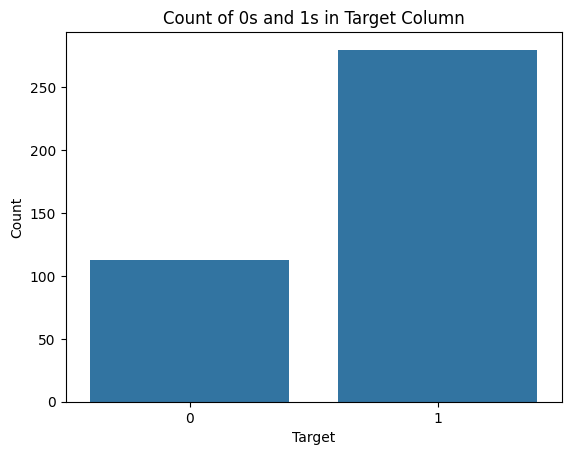

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df)

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Target Column')

plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
28/28 - 7s - 252ms/step - accuracy: 0.7287 - loss: 0.6843 - val_accuracy: 0.6757 - val_loss: 0.7647
Epoch 2/50
28/28 - 1s - 32ms/step - accuracy: 0.7586 - loss: 0.6004 - val_accuracy: 0.6351 - val_loss: 0.7156
Epoch 3/50
28/28 - 0s - 10ms/step - accuracy: 0.7678 - loss: 0.5729 - val_accuracy: 0.6216 - val_loss: 0.7048
Epoch 4/50
28/28 - 1s - 21ms/step - accuracy: 0.7770 - loss: 0.5566 - val_accuracy: 0.6351 - val_loss: 0.7054
Epoch 5/50
28/28 - 0s - 8ms/step - accuracy: 0.7839 - loss: 0.5367 - val_accuracy: 0.6622 - val_loss: 0.6877
Epoch 6/50
28/28 - 0s - 8ms/step - accuracy: 0.7747 - loss: 0.5296 - val_accuracy: 0.6622 - val_loss: 0.6887
Epoch 7/50
28/28 - 0s - 8ms/step - accuracy: 0.7816 - loss: 0.5191 - val_accuracy: 0.6757 - val_loss: 0.6612
Epoch 8/50
28/28 - 0s - 8ms/step - accuracy: 0.7908 - loss: 0.4951 - val_accuracy: 0.7162 - val_loss: 0.6634
Epoch 9/50
28/28 - 0s - 11ms/step - accuracy: 0.7839 - loss: 0.4826 - val_accuracy: 0.7027 - val_loss: 0.6656
Epoch 10/50
2

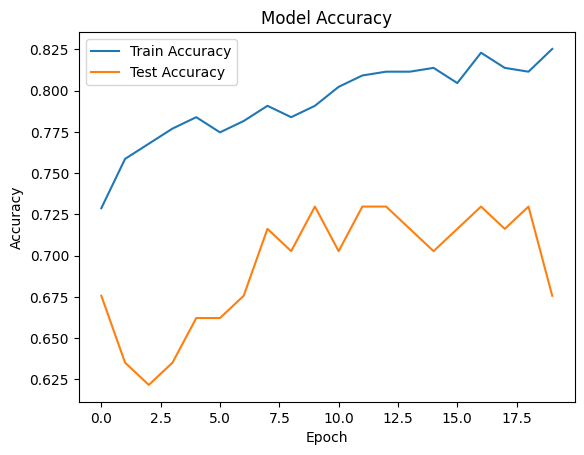

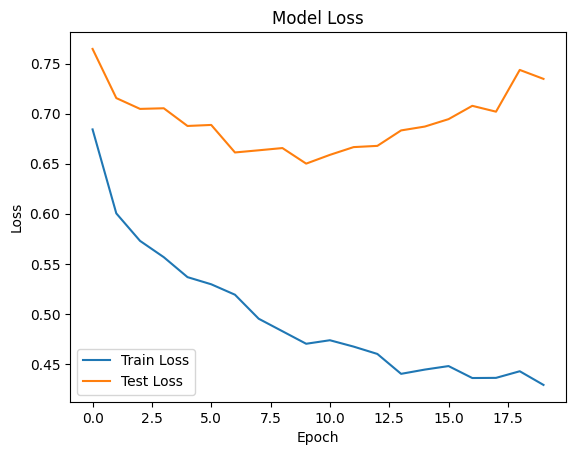

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import GRU, Bidirectional, Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

features = ['Retail Sales Change Sign', 'DJI 7-Day % Change Sign', 'Impact', 'Above EMA 20', 'Sentiment']
target = 'Target'

data_features = df[features].values
data_target = df[target].values

scaler = StandardScaler()
data_features = scaler.fit_transform(data_features)

def new_dataset(data_features, data_target, step_size):
    X, Y = [], []
    for i in range(len(data_features) - step_size):
        X.append(data_features[i:(i + step_size), :])
        Y.append(data_target[i + step_size])
    return np.array(X), np.array(Y)

step_size = 5
train_size = int(len(data_features) * 0.8)
train_features, test_features = data_features[:train_size], data_features[train_size:]
train_target, test_target = data_target[:train_size], data_target[train_size:]

smote = SMOTE(random_state=42)
train_features_balanced, train_target_balanced = smote.fit_resample(train_features, train_target)

trainX, trainY = new_dataset(train_features_balanced, train_target_balanced, step_size)
testX, testY = new_dataset(test_features, test_target, step_size)

trainX = np.reshape(trainX, (trainX.shape[0], step_size, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], step_size, testX.shape[2]))

class_weights = compute_class_weight('balanced', classes=np.unique(train_target_balanced), y=train_target_balanced)
class_weights = dict(enumerate(class_weights))

model = Sequential()
model.add(Bidirectional(GRU(64, return_sequences=True, kernel_regularizer=l2(0.001)), input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.3))
model.add(GRU(32, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(trainX, trainY, epochs=50, batch_size=16, verbose=2, class_weight=class_weights, validation_data=(testX, testY), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = (model.predict(testX) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Correlation Matrix for Selected Columns:
                          Retail Sales Change Sign  DJI 7-Day % Change Sign  \
Retail Sales Change Sign                  1.000000                 0.040710   
DJI 7-Day % Change Sign                   0.040710                 1.000000   
Impact                                    0.109444                 0.377144   
Above EMA 20                              0.159301                 0.192456   
Sentiment                                -0.042458                 0.058547   

                            Impact  Above EMA 20  Sentiment  
Retail Sales Change Sign  0.109444      0.159301  -0.042458  
DJI 7-Day % Change Sign   0.377144      0.192456   0.058547  
Impact                    1.000000      0.032105   0.050182  
Above EMA 20              0.032105      1.000000  -0.006329  
Sentiment                 0.050182     -0.006329   1.000000  


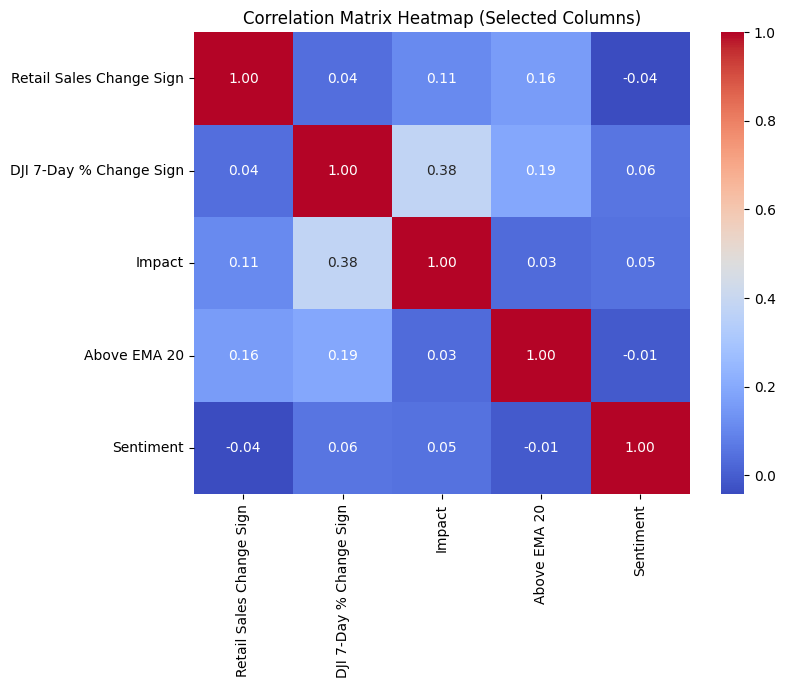

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Retail Sales Change Sign', 'DJI 7-Day % Change Sign',
                    'Impact', 'Above EMA 20', 'Sentiment']

correlation_matrix = df[selected_columns].corr()

print("Correlation Matrix for Selected Columns:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap (Selected Columns)")
plt.show()


In [ ]:
correlation_matrix

,Retail Sales Change Sign,DJI 7-Day % Change Sign,Impact,Above EMA 20,Sentiment
Retail Sales Change Sign,1.000000,0.040710,0.109444,0.159301,-0.042458
DJI 7-Day % Change Sign,0.040710,1.000000,0.377144,0.192456,0.058547
Impact,0.109444,0.377144,1.000000,0.032105,0.050182
Above EMA 20,0.159301,0.192456,0.032105,1.000000,-0.006329
Sentiment,-0.042458,0.058547,0.050182,-0.006329,1.000000


Plots for Balanced Dataset:


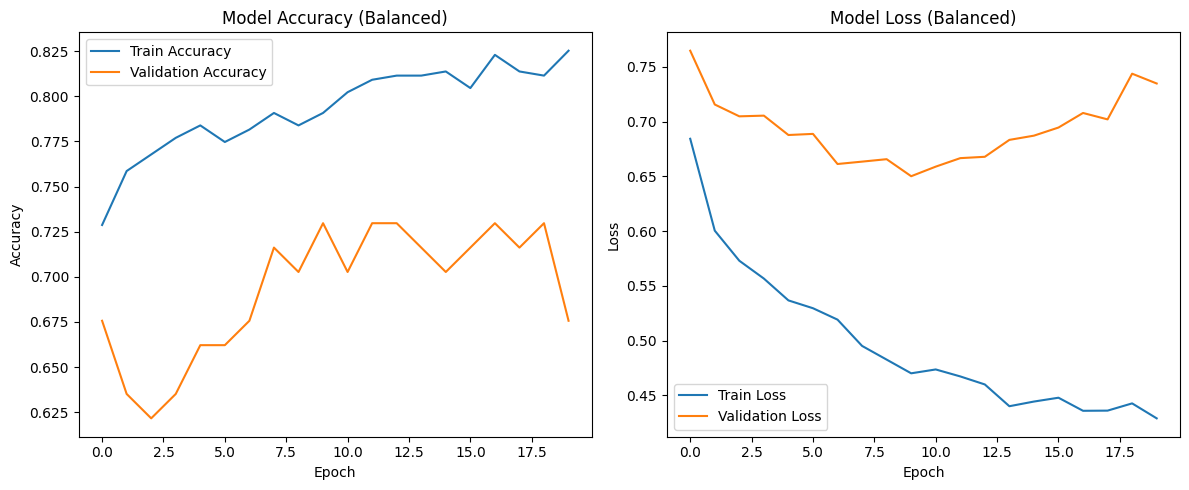

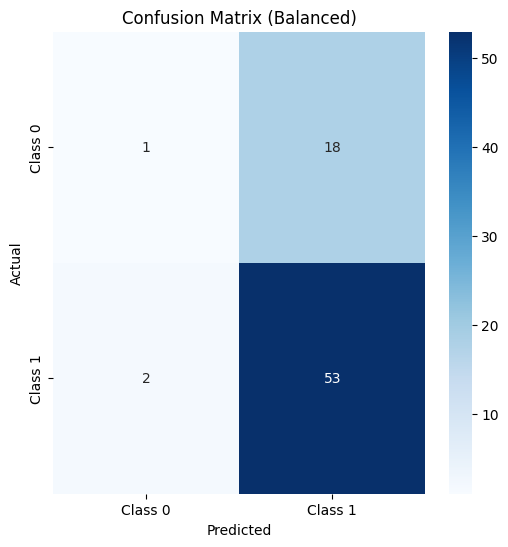

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


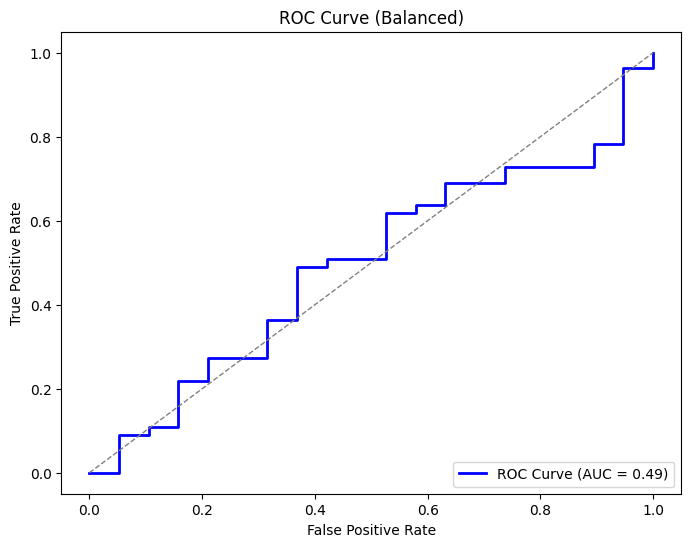

Training on Imbalanced Dataset...
Epoch 1/50
20/20 - 1s - 73ms/step - accuracy: 0.7476 - loss: 0.6036 - val_accuracy: 0.7162 - val_loss: 0.6382
Epoch 2/50
20/20 - 1s - 27ms/step - accuracy: 0.7443 - loss: 0.5980 - val_accuracy: 0.7162 - val_loss: 0.6463
Epoch 3/50
20/20 - 0s - 14ms/step - accuracy: 0.7379 - loss: 0.5932 - val_accuracy: 0.7162 - val_loss: 0.6454
Epoch 4/50
20/20 - 0s - 16ms/step - accuracy: 0.7282 - loss: 0.6014 - val_accuracy: 0.7027 - val_loss: 0.6422
Epoch 5/50
20/20 - 0s - 16ms/step - accuracy: 0.7443 - loss: 0.5813 - val_accuracy: 0.6892 - val_loss: 0.6474
Epoch 6/50
20/20 - 1s - 26ms/step - accuracy: 0.7379 - loss: 0.5843 - val_accuracy: 0.7027 - val_loss: 0.6528
Epoch 7/50
20/20 - 0s - 9ms/step - accuracy: 0.7476 - loss: 0.5750 - val_accuracy: 0.7162 - val_loss: 0.6371
Epoch 8/50
20/20 - 0s - 9ms/step - accuracy: 0.7443 - loss: 0.5832 - val_accuracy: 0.7162 - val_loss: 0.6432
Epoch 9/50
20/20 - 0s - 10ms/step - accuracy: 0.7508 - loss: 0.5654 - val_accuracy: 0.71

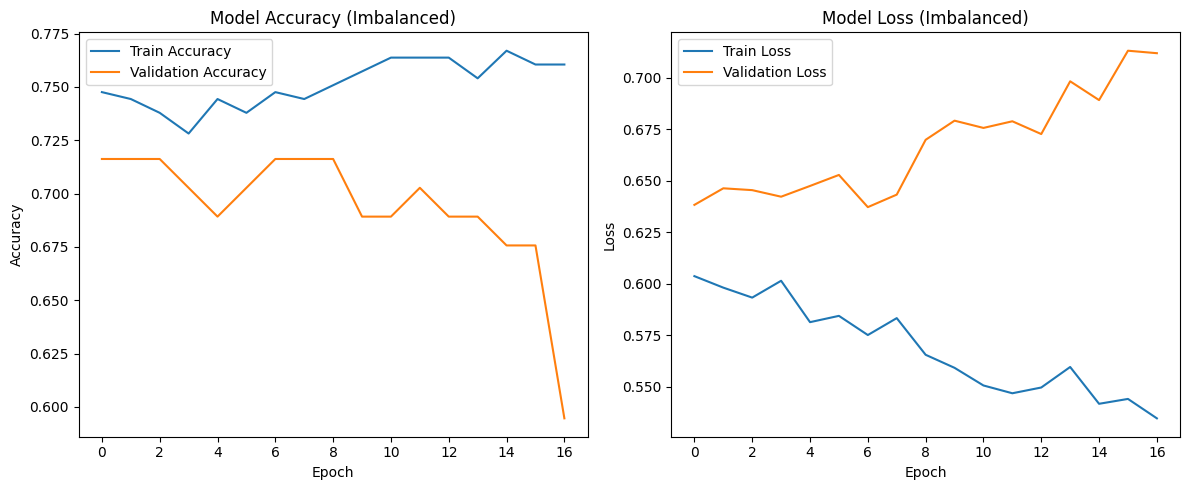

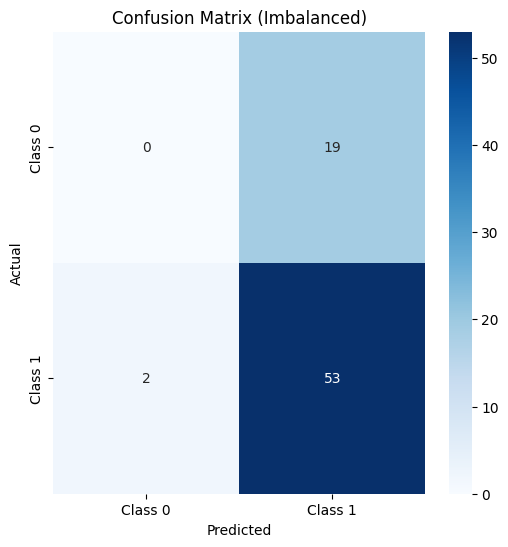

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


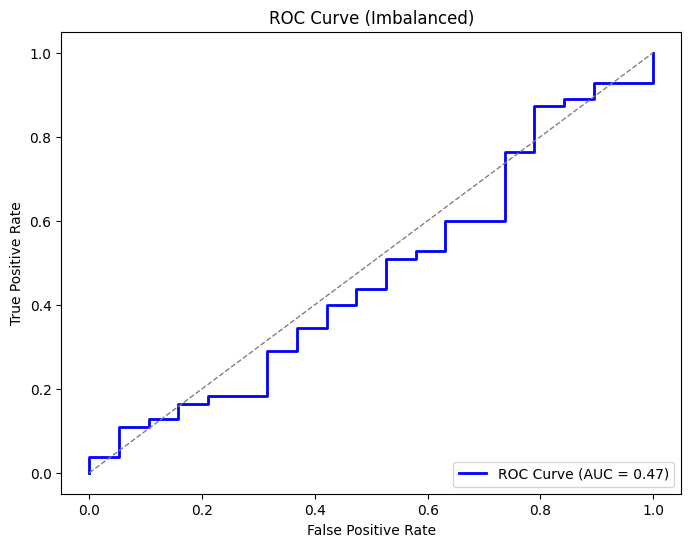

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

def plot_training_history(history, title_suffix=""):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title_suffix=""):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.title(f'ROC Curve {title_suffix}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

print("Plots for Balanced Dataset:")
plot_training_history(history, title_suffix="(Balanced)")
cm_balanced = confusion_matrix(testY, test_predictions)
plot_confusion_matrix(cm_balanced, classes=['Class 0', 'Class 1'], title='Confusion Matrix (Balanced)')
plot_roc_curve(testY, model.predict(testX).ravel(), title_suffix="(Balanced)")

print("Training on Imbalanced Dataset...")
trainX_imbalanced, trainY_imbalanced = new_dataset(train_features, train_target, step_size)
trainX_imbalanced = np.reshape(trainX_imbalanced, (trainX_imbalanced.shape[0], step_size, trainX_imbalanced.shape[2]))
history_imbalanced = model.fit(
    trainX_imbalanced, trainY_imbalanced,
    epochs=50, batch_size=16, verbose=2,
    validation_data=(testX, testY), callbacks=[early_stopping]
)

test_predictions_imbalanced = (model.predict(testX) > 0.5).astype("int32")
cm_imbalanced = confusion_matrix(testY, test_predictions_imbalanced)

print("Plots for Imbalanced Dataset:")
plot_training_history(history_imbalanced, title_suffix="(Imbalanced)")
plot_confusion_matrix(cm_imbalanced, classes=['Class 0', 'Class 1'], title='Confusion Matrix (Imbalanced)')
plot_roc_curve(testY, model.predict(testX).ravel(), title_suffix="(Imbalanced)")


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

features = ['Retail Sales Change Sign', 'DJI 7-Day % Change Sign', 'Impact', 'Above EMA 20', 'Sentiment']
target = 'Target'

data_features = df[features].values
data_target = df[target].values

scaler = StandardScaler()
data_features = scaler.fit_transform(data_features)

def new_dataset(data_features, data_target, step_size):
    X, Y = [], []
    for i in range(len(data_features) - step_size):
        X.append(data_features[i:(i + step_size), :])
        Y.append(data_target[i + step_size])
    return np.array(X), np.array(Y)

step_size = 5
train_size = int(len(data_features) * 0.8)
train_features, test_features = data_features[:train_size], data_features[train_size:]
train_target, test_target = data_target[:train_size], data_target[train_size:]

smote = SMOTE(random_state=42)
train_features_balanced, train_target_balanced = smote.fit_resample(train_features, train_target)

trainX, trainY = new_dataset(train_features_balanced, train_target_balanced, step_size)
testX, testY = new_dataset(test_features, test_target, step_size)

trainX = trainX.reshape(trainX.shape[0], -1)
testX = testX.reshape(testX.shape[0], -1)

class_weights = compute_class_weight('balanced', classes=np.unique(train_target_balanced), y=train_target_balanced)
class_weights = dict(enumerate(class_weights))

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
log_reg.fit(trainX, trainY)

test_accuracy = log_reg.score(testX, testY)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = log_reg.predict(testX)
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))



Test Accuracy: 62.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.16      0.18        19
           1       0.73      0.78      0.75        55

    accuracy                           0.62        74
   macro avg       0.46      0.47      0.47        74
weighted avg       0.59      0.62      0.61        74

Confusion Matrix:
[[ 3 16]
 [12 43]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_classifier.fit(trainX, trainY)

test_accuracy = dt_classifier.score(testX, testY)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = dt_classifier.predict(testX)
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))


Test Accuracy: 60.81%
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.47      0.38        19
           1       0.78      0.65      0.71        55

    accuracy                           0.61        74
   macro avg       0.55      0.56      0.55        74
weighted avg       0.66      0.61      0.63        74

Confusion Matrix:
[[ 9 10]
 [19 36]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(trainX, trainY)

test_accuracy = rf_classifier.score(testX, testY)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = rf_classifier.predict(testX)
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))

Test Accuracy: 66.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.26      0.29        19
           1       0.76      0.80      0.78        55

    accuracy                           0.66        74
   macro avg       0.54      0.53      0.53        74
weighted avg       0.64      0.66      0.65        74

Confusion Matrix:
[[ 5 14]
 [11 44]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_classifier = SVC(class_weight='balanced', random_state=42)
svm_classifier.fit(trainX, trainY)

test_accuracy = svm_classifier.score(testX, testY)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = svm_classifier.predict(testX)
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))

Test Accuracy: 70.27%
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.16      0.21        19
           1       0.75      0.89      0.82        55

    accuracy                           0.70        74
   macro avg       0.54      0.52      0.52        74
weighted avg       0.65      0.70      0.66        74

Confusion Matrix:
[[ 3 16]
 [ 6 49]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn_classifier.fit(trainX, trainY)

test_accuracy = knn_classifier.score(testX, testY)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = knn_classifier.predict(testX)
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))


Test Accuracy: 63.51%
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.26      0.27        19
           1       0.75      0.76      0.76        55

    accuracy                           0.64        74
   macro avg       0.51      0.51      0.51        74
weighted avg       0.63      0.64      0.63        74

Confusion Matrix:
[[ 5 14]
 [13 42]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(trainX, trainY)

test_accuracy = gb_classifier.score(testX, testY)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = gb_classifier.predict(testX)
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))


Test Accuracy: 66.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.26      0.29        19
           1       0.76      0.80      0.78        55

    accuracy                           0.66        74
   macro avg       0.54      0.53      0.53        74
weighted avg       0.64      0.66      0.65        74

Confusion Matrix:
[[ 5 14]
 [11 44]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

nn_model = Sequential()
nn_model.add(Dense(64, input_dim=trainX.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=2)

test_loss, test_accuracy = nn_model.evaluate(testX, testY)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

test_predictions = (nn_model.predict(testX) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(testY, test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, test_predictions))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 - 3s - 248ms/step - accuracy: 0.6000 - loss: 0.6764
Epoch 2/20
14/14 - 0s - 4ms/step - accuracy: 0.7195 - loss: 0.5741
Epoch 3/20
14/14 - 0s - 4ms/step - accuracy: 0.7770 - loss: 0.5203
Epoch 4/20
14/14 - 0s - 4ms/step - accuracy: 0.7793 - loss: 0.4879
Epoch 5/20
14/14 - 0s - 10ms/step - accuracy: 0.8023 - loss: 0.4631
Epoch 6/20
14/14 - 0s - 4ms/step - accuracy: 0.8092 - loss: 0.4437
Epoch 7/20
14/14 - 0s - 4ms/step - accuracy: 0.8138 - loss: 0.4280
Epoch 8/20
14/14 - 0s - 4ms/step - accuracy: 0.8184 - loss: 0.4132
Epoch 9/20
14/14 - 0s - 13ms/step - accuracy: 0.8230 - loss: 0.3993
Epoch 10/20
14/14 - 0s - 9ms/step - accuracy: 0.8253 - loss: 0.3867
Epoch 11/20
14/14 - 0s - 13ms/step - accuracy: 0.8276 - loss: 0.3763
Epoch 12/20
14/14 - 0s - 8ms/step - accuracy: 0.8345 - loss: 0.3626
Epoch 13/20
14/14 - 0s - 12ms/step - accuracy: 0.8529 - loss: 0.3537
Epoch 14/20
14/14 - 0s - 17ms/step - accuracy: 0.8552 - loss: 0.3413
Epoch 15/20
14/14 - 0s - 10ms/step - accuracy: 0.8713 - loss:

# **Conclusion**

The Bidirectional LSTM model successfully learned from both economic indicators and market sentiment, achieving excellent accuracy in predicting stock market trends. However, given the complexities and volatility of the financial markets, it is critical to validate and continuously update the model with new data. With further refinement, this model could provide valuable insights for market prediction and assist in financial decision-making.



